In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pumpkins = pd.read_csv("../data/US-pumpkins.csv")
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [3]:
column_to_keep = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, column_to_keep]

In [4]:
price = (pumpkins["Low Price"] + pumpkins["High Price"])/2
month = pd.DatetimeIndex(pumpkins["Date"]).month

In [5]:
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})

In [6]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

Text(0, 0.5, 'Pumpkin Price')

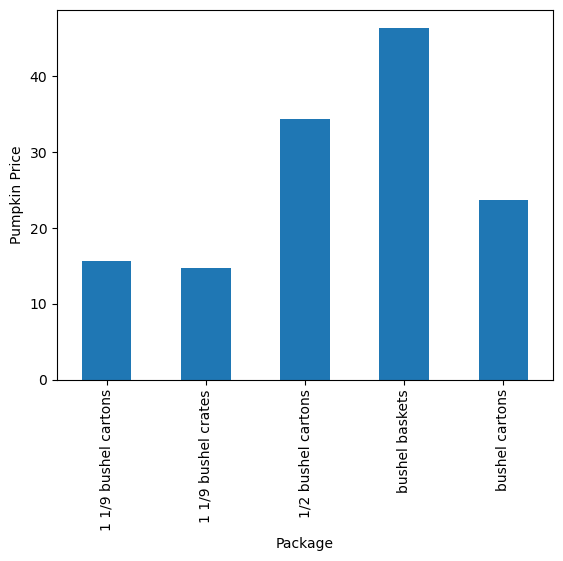

In [10]:
new_pumpkins.groupby(['Package'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

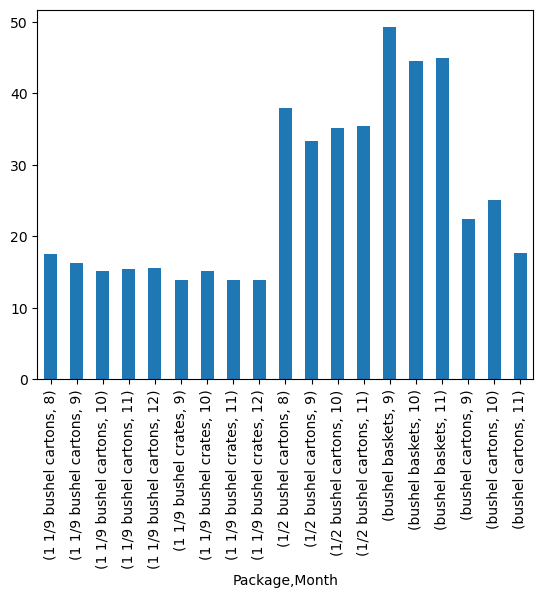

In [15]:
new_pumpkins.groupby(['Package',"Month"])['Price'].mean().plot(kind="bar")
plt.show()